In [70]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os.path

#initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter API Keys (load from untracked_api_key.txt)

with open('untracked_api_key_twitter.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes file_object.readline()
    consumer_key  = str(file_object.readline()).strip()
    consumer_secret = str(file_object.readline()).strip()
    access_token = str(file_object.readline()).strip()
    access_token_secret = str(file_object.readline()).strip()

#tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [71]:
target_user_list = ["@BBC", "@CBS", "@CNN", "@foxnews","@nytimes"]

sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    for user in target_user_list:
        counter = 1
        public_tweets = api.user_timeline(target_user)

        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"User":user,
                               "Date": tweet["created_at"], 
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
          
            # Add to counter 
            counter = counter + 1


In [76]:
#convert sentiment list into dataframe object
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#reorder columns in dataframe
sentiments_pd = sentiments_pd[['User','Date','Tweet','Tweets Ago','Compound','Negative','Neutral','Positive']]
sentiments_pd.head()

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
0,@BBC,Thu Jan 11 00:06:50 +0000 2018,@PreciseWrds We're so glad to hear that! We'll...,1,0.8676,0.571,0.000,0.429
1,@BBC,Thu Jan 11 00:04:17 +0000 2018,"@kendra_owusu Hey there, Kendra. Points purcha...",2,0.0000,1.000,0.000,0.000
2,@BBC,Thu Jan 11 00:03:30 +0000 2018,@phantasticfam We aim to please! Your love mea...,3,0.7348,0.710,0.061,0.229
3,@BBC,Thu Jan 11 00:03:22 +0000 2018,@dannyhoeft While our Tier Member standby prog...,4,0.4019,0.870,0.000,0.130
4,@BBC,Thu Jan 11 00:00:54 +0000 2018,@AmyInjaianWF While we can't make any promises...,5,0.4617,0.775,0.077,0.148


In [69]:
# save sentiment data to csv
sentiments_pd.to_csv("TwitterMoodSentiment.csv")


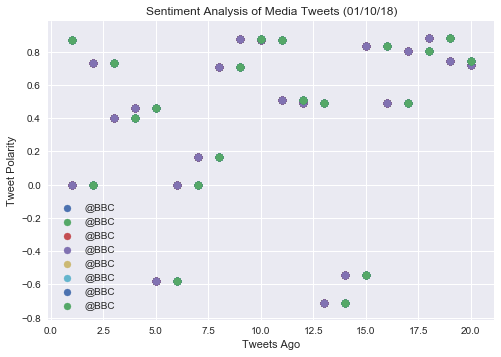

In [74]:
# Create plot
#plt.plot(np.arange(len(sentiments_pd["Compound"])),
         #sentiments_pd["Compound"], marker="o", linewidth=0.5,
         #alpha=0.8)
plt.scatter(sentiments_pd["Tweets Ago"],sentiments_pd["Compound"])

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.legend(sentiments_pd["User"])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()